In [1]:
# Import the data

import pandas as pd

data = pd.read_csv('base3.csv')

data.head(2).T

,0,1
NNRS,0.750000,0.750000
GATS5v,0.857987,1.052524
GATS7i,1.166730,0.904085
P_VSA_LogP_4,121.268295,88.678150
P_VSA_s_5,33.190527,18.010751
Eta_betaP,25.000000,22.500000
Chi1_EA(dm),6.140888,14.113280
SM11_AEA(ri),4.575986,4.609386
Mor13v,-0.879274,-1.088973
B07[N-F],1.000000,0.000000


In [2]:
#idx = [77, 81, 84, 92, 98]
#data = data.drop(idx,0)
#data.shape

In [3]:
data.describe()

,NNRS,GATS5v,GATS7i,P_VSA_LogP_4,P_VSA_s_5,Eta_betaP,Chi1_EA(dm),SM11_AEA(ri),Mor13v,B07[N-F],F05[N-F],F05[O-O],LLS_01,alvo
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.785043,0.984407,0.813803,102.453737,40.047243,28.051282,26.050540,4.613682,-1.434500,0.384615,0.863248,0.085470,0.210826,5.725175
std,0.022993,0.065593,0.129275,14.702537,15.708500,3.418626,6.849924,0.004607,0.203981,0.488597,1.376565,0.309968,0.077041,0.676957
min,0.750000,0.851824,0.535831,83.973500,18.010751,22.500000,6.140888,4.575986,-1.854624,0.000000,0.000000,0.000000,0.166667,4.522879
25%,0.750000,0.939553,0.726618,88.678150,36.021501,23.000000,22.305156,4.609387,-1.592759,0.000000,0.000000,0.000000,0.166667,5.300162
50%,0.800000,0.971291,0.793499,113.823077,36.021501,30.000000,26.077640,4.615905,-1.466393,0.000000,0.000000,0.000000,0.166667,5.756962
75%,0.800000,1.038441,0.930368,118.527727,54.032252,30.500000,30.146704,4.615931,-1.287729,1.000000,2.000000,0.000000,0.333333,6.050610
max,0.800000,1.205891,1.166730,121.268295,99.986346,31.000000,44.490042,4.616051,-0.879274,1.000000,6.000000,2.000000,0.500000,8.000000


In [4]:
#data.drop(columns=['NNRS'], axis=1, inplace=True)
data.shape

(117, 14)

In [5]:
# Split the data into two dataframes
X_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=.8, random_state=0)

In [7]:
# Fit a K-nearest neighbors model with a value of k=3
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_features=4)#criterion='poisson'
# n_estimators=100, max_features=12

rf = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

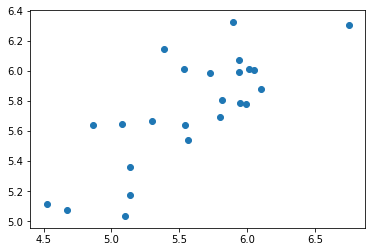

In [8]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

In [9]:
from scipy import stats
r = stats.pearsonr(y_test, y_pred)[0]
r2 = r * r
print(f'R: {r}' )
print(f'R2: {r2}' )

R: 0.7882316773070411
R2: 0.6213091771102714


### Feature importance based on mean decrease in impurity

In [13]:
import time
import numpy as np

In [14]:
start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


Elapsed time to compute the importances: 0.023 seconds


In [15]:
feature_names = list(X_train.columns)

In [16]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 3.339 seconds


In [17]:
most_important = forest_importances.sort_values(ascending=False)[:8]
l_X  = [x for x, y in most_important.items()]
l_Y  = [y for x, y in most_important.items()]

In [18]:
l_X

['P_VSA_LogP_4',
 'SM11_AEA(ri)',
 'GATS5v',
 'GATS7i',
 'F05[N-F]',
 'Chi1_EA(dm)',
 'Eta_betaP',
 'B07[N-F]']

In [19]:
l_Y

[0.3119346561941908,
 0.16094757216567285,
 0.10297269384817995,
 0.07494243908131099,
 0.020024452036588203,
 0.014337636623062866,
 0.010167942067741164,
 0.005681413912615951]

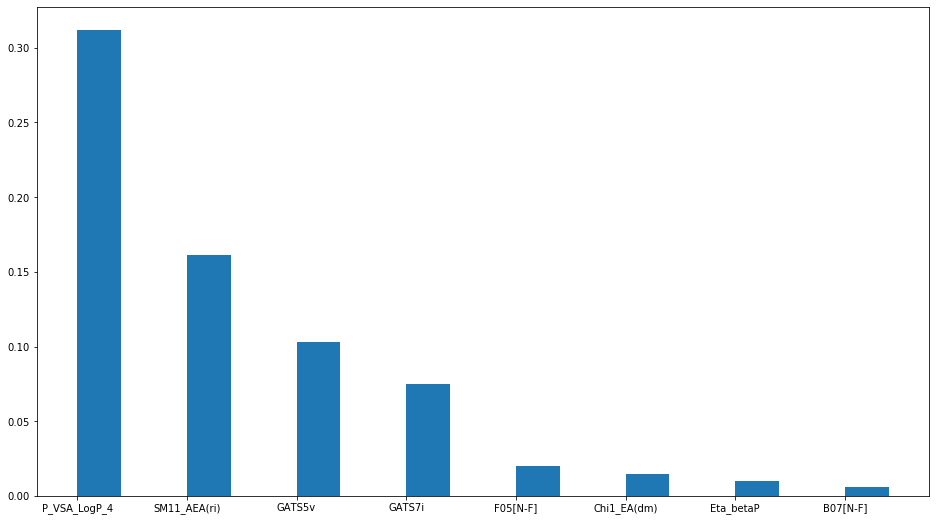

In [20]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.bar(l_X, l_Y, align='edge', width=0.4)
plt.show()

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5130179875995908